In [40]:
import pandas as pd

# # Install scikit-learn
# %pip install scikit-learn


from sklearn.linear_model import (
    LinearRegression,
)  # used to create a linear regression model.
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    mean_absolute_percentage_error,
)  # evaluate the performance of machine learning models
import numpy as np
import matplotlib.pyplot as plt

# %pip install statsmodels
import statsmodels.api as sm


In [41]:
# Load dataset
df = pd.read_excel('Silver_data_filtered.xlsx')

In [42]:
# Display the first few rows
print(df.head())

# Check for any missing values
print(df.isnull().sum())

        date    open    high     low   close  volume
0 2019-03-01  15.555  15.575  15.080  15.169     585
1 2019-03-04  15.170  15.205  15.005  15.017     317
2 2019-03-05  15.025  15.075  15.005  15.020     222
3 2019-03-06  15.025  15.025  14.975  15.003      25
4 2019-03-07  15.025  15.025  14.920  14.960       8
date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64


In [43]:
# Check the data types of all columns in the DataFrame
print(df.dtypes)


date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
dtype: object



SPLITING DATA 7-2-1


In [44]:
# Split the data into training, testing, and validation sets (7:2:1)
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [45]:
# Part of preparing data for training model
x_train = np.array(train_data.index).reshape(-1, 1) #reshapes the array into a 2D array
y_train = np.array(train_data['close']) #converts the "close" column of the train_data DataFrame into a 1D NumPy array

In [46]:
# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [47]:
# The trained model uses the x_test data to make predictions, and the predicted values are stored in y_pred.
# Testing process
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data["close"])
y_pred = model.predict(x_test)

# Validation process
x_val = np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data["close"])
y_pred_val = model.predict(x_val)

In [48]:
# Create index predict for next 30 days
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[28.50411107 28.51262539 28.52113972 28.52965405 28.53816838 28.5466827
 28.55519703 28.56371136 28.57222569 28.58074001 28.58925434 28.59776867
 28.606283   28.61479732 28.62331165 28.63182598 28.64034031 28.64885463
 28.65736896 28.66588329 28.67439762 28.68291194 28.69142627 28.6999406
 28.70845493 28.71696925 28.72548358 28.73399791 28.74251224 28.75102656]


In [49]:
# Calculate accuracy for each model
# rmse
test_mse = mean_squared_error(y_test, y_pred)
val_mse = mean_squared_error(y_val, y_pred_val)

test_rmse = np.sqrt(test_mse)
val_rmse = np.sqrt(val_mse)

# mae
test_mae = mean_absolute_error(y_test, y_pred)
val_mae = mean_absolute_error(y_val, y_pred_val)

# mape
test_ape = np.abs((y_test - y_pred) / y_test)
val_ape = np.abs((y_val - y_pred_val) / y_val)
test_mape = np.mean(test_ape) * 100
val_mape = np.mean(val_ape) * 100


print("Testing RMSE: ", test_rmse)
print("Testing MAE: ", test_mae)
print("Testing MAPE: ", test_mape)
print("Validation RMSE: ", val_rmse)
print("Validation MAE: ", val_mae)
print("Validation MAPE: ", val_mape)

Testing RMSE:  3.2114498097468114
Testing MAE:  2.935663304960311
Testing MAPE:  12.90983195740972
Validation RMSE:  3.43198827317816
Validation MAE:  2.9697599378638
Validation MAPE:  12.265816497568125


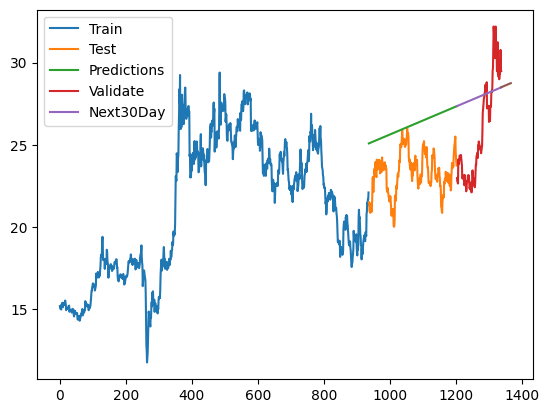

In [50]:
# Plot



plt.plot(train_data.index, train_data['close'])
plt.plot(test_data.index, test_data['close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index,val_data['close'])
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [51]:
X = sm.add_constant(df.index)
model_stat = sm.OLS(df['close'], X)
results = model_stat.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  close   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     710.2
Date:                Sat, 09 Nov 2024   Prob (F-statistic):          7.95e-126
Time:                        09:36:01   Log-Likelihood:                -3463.3
No. Observations:                1338   AIC:                             6931.
Df Residuals:                    1336   BIC:                             6941.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.9370      0.176    101.855      0.0

I. Analyze Residuals (7:2:1)

1. Residual Plot

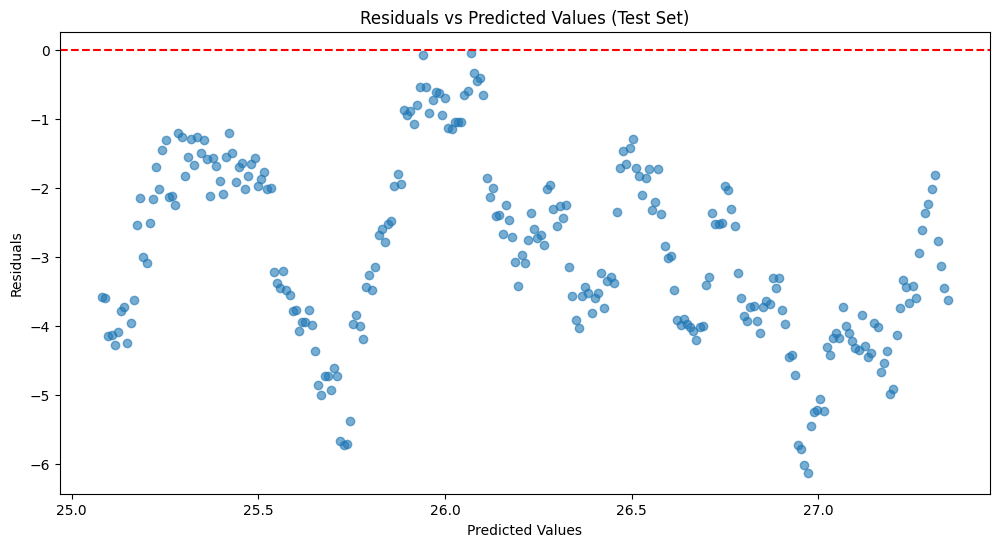

In [52]:
residuals_test = y_test - y_pred
residuals_val = y_val - y_pred_val

# Plotting residuals for the test set
plt.figure(figsize=(12, 6))
plt.scatter(y_pred, residuals_test, alpha=0.6) #lower alpha (e.g., 0.3–0.7) to make overlapping parts visible.
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Test Set)')
plt.show()


2. Histogram of Residuals:

In [53]:
bins = int(np.sqrt(len(df)))
bins

36

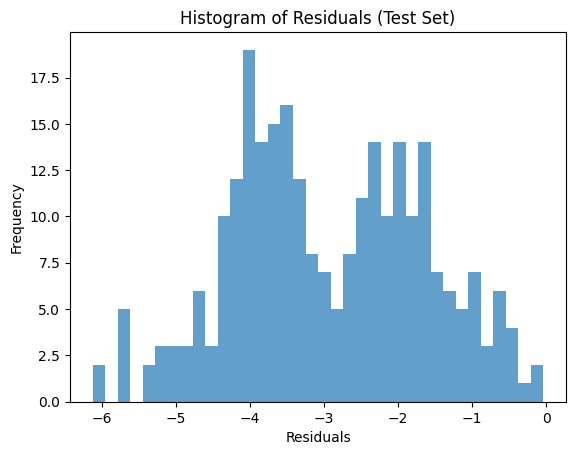

In [54]:
#bins: a value around 20–30 for general use and adjust based on how detailed you want the histogram to appear.
plt.hist(residuals_test, bins, alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals (Test Set)')
plt.show()


II. Test Assumptions

1. Linearity Assumption:

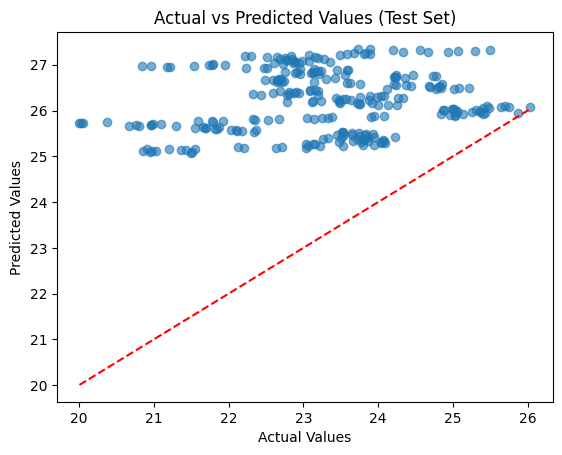

In [55]:
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Test Set)')
plt.show()


2. Homoscedasticity (Variance Uniformity):
#Use the residuals plot from Step 1 for this check.


3. Independence of Residuals:



In [56]:
from statsmodels.stats.stattools import durbin_watson

dw_test = durbin_watson(residuals_test)
print('Durbin-Watson statistic:', dw_test)


Durbin-Watson statistic: 0.014213273533000817


SPLITING DATA 6-3-1

In [57]:
# Split the data into training, testing, and validation sets (6:3:1)
train_size = int(0.6 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [58]:
# Part of preparing data for training model
x_train = np.array(train_data.index).reshape(-1, 1) #reshapes the array into a 2D array
y_train = np.array(train_data['close']) #converts the "close" column of the train_data DataFrame into a 1D NumPy array

In [59]:
# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [60]:
# The trained model uses the x_test data to make predictions, and the predicted values are stored in y_pred.
# Testing process
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data["close"])
y_pred = model.predict(x_test)

# Validation process
x_val = np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data["close"])
y_pred_val = model.predict(x_val)

In [61]:
# Create index predict for next 30 days
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[35.52379961 35.53899976 35.55419991 35.56940006 35.58460021 35.59980036
 35.61500051 35.63020065 35.6454008  35.66060095 35.6758011  35.69100125
 35.7062014  35.72140155 35.7366017  35.75180185 35.767002   35.78220215
 35.7974023  35.81260245 35.8278026  35.84300274 35.85820289 35.87340304
 35.88860319 35.90380334 35.91900349 35.93420364 35.94940379 35.96460394]


In [62]:
# Calculate accuracy for each model
# rmse
test_mse = mean_squared_error(y_test, y_pred)
val_mse = mean_squared_error(y_val, y_pred_val)

test_rmse = np.sqrt(test_mse)
val_rmse = np.sqrt(val_mse)

# mae
test_mae = mean_absolute_error(y_test, y_pred)
val_mae = mean_absolute_error(y_val, y_pred_val)

# mape
test_ape = np.abs((y_test - y_pred) / y_test)
val_ape = np.abs((y_val - y_pred_val) / y_val)
test_mape = np.mean(test_ape) * 100
val_mape = np.mean(val_ape) * 100


print("Testing RMSE: ", test_rmse)
print("Testing MAE: ", test_mae)
print("Testing MAPE: ", test_mape)
print("Validation RMSE: ", val_rmse)
print("Validation MAE: ", val_mae)
print("Validation MAPE: ", val_mape)

Testing RMSE:  8.38706381821791
Testing MAE:  8.231382376935331
Testing MAPE:  37.791479130232936
Validation RMSE:  9.059057922029307
Validation MAE:  8.721004186671774
Validation MAPE:  35.31547652514683


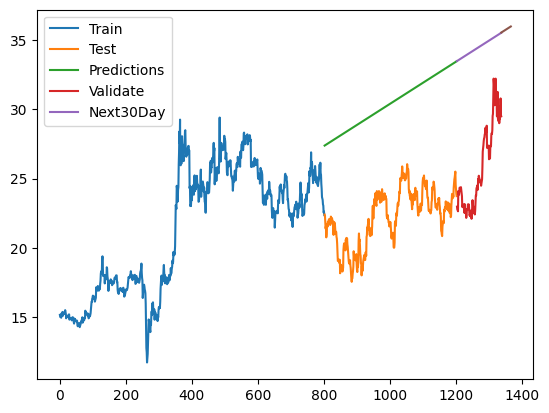

In [63]:
# Plot
plt.plot(train_data.index, train_data['close'])
plt.plot(test_data.index, test_data['close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index,val_data['close'])
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [64]:
X = sm.add_constant(df.index)
model_stat = sm.OLS(df['close'], X)
results = model_stat.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  close   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     710.2
Date:                Sat, 09 Nov 2024   Prob (F-statistic):          7.95e-126
Time:                        09:36:01   Log-Likelihood:                -3463.3
No. Observations:                1338   AIC:                             6931.
Df Residuals:                    1336   BIC:                             6941.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.9370      0.176    101.855      0.0

I. Analyze Residuals (6:3:1)

1. Residual Plot

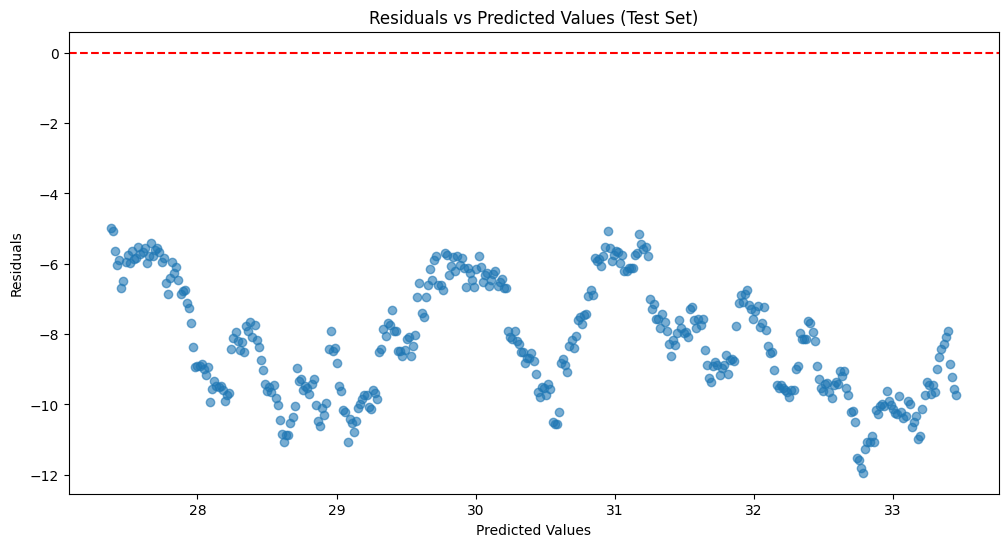

In [65]:
residuals_test = y_test - y_pred
residuals_val = y_val - y_pred_val

# Plotting residuals for the test set
plt.figure(figsize=(12, 6))
plt.scatter(y_pred, residuals_test, alpha=0.6) #lower alpha (e.g., 0.3–0.7) to make overlapping parts visible.
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Test Set)')
plt.show()


In [66]:
bins = int(np.sqrt(len(df)))
bins

36

2. Histogram of Residuals:

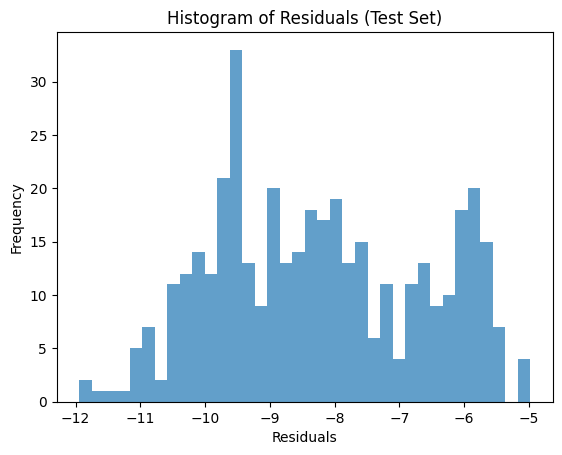

In [67]:
#bins: a value around 20–30 for general use and adjust based on how detailed you want the histogram to appear.
plt.hist(residuals_test, bins, alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals (Test Set)')
plt.show()


I. TEST ASSUMPTION:

1. LINEARITY ASSUMPTION

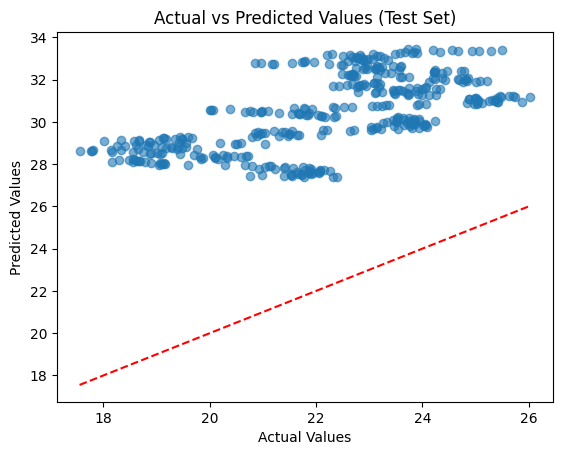

In [68]:
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Test Set)')
plt.show()


2. Homoscedasticity (Variance Uniformity):
#Use the residuals plot from Step 1 for this check.


3. Independence of Residuals:



In [69]:
from statsmodels.stats.stattools import durbin_watson

dw_test = durbin_watson(residuals_test)
print('Durbin-Watson statistic:', dw_test)


Durbin-Watson statistic: 0.002183469657042955


SPLITING DATA 5-3-2

In [70]:
# Split the data into training, testing, and validation sets
train_size = int(0.5 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [71]:
# Training process
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)
result = model.fit(x_train, y_train)

# Testing process
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['close'])
y_pred = model.predict(x_test)

# Validation process
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['close'])
y_pred_val =  model.predict(x_val)
# Create index predict for next 30 days
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[41.30192126 41.32239113 41.342861   41.36333087 41.38380074 41.40427061
 41.42474048 41.44521035 41.46568022 41.48615009 41.50661996 41.52708983
 41.5475597  41.56802957 41.58849944 41.60896931 41.62943918 41.64990905
 41.67037892 41.69084879 41.71131866 41.73178853 41.7522584  41.77272827
 41.79319814 41.81366801 41.83413788 41.85460775 41.87507762 41.89554749]


In [72]:
# Calculate accuracy for each model
# rmse
test_mse = mean_squared_error(y_test, y_pred)
val_mse = mean_squared_error(y_val, y_pred_val)

test_rmse = np.sqrt(test_mse)
val_rmse = np.sqrt(val_mse)

# mae
test_mae = mean_absolute_error(y_test, y_pred)
val_mae = mean_absolute_error(y_val, y_pred_val)

# mape
test_ape = np.abs((y_test - y_pred) / y_test)
val_ape = np.abs((y_val - y_pred_val) / y_val)
test_mape = np.mean(test_ape) * 100
val_mape = np.mean(val_ape) * 100


print("Testing RMSE: ", test_rmse)
print("Testing MAE: ", test_mae)
print("Testing MAPE: ", test_mape)
print("Validation RMSE: ", val_rmse)
print("Validation MAE: ", val_mae)
print("Validation MAPE: ", val_mape)

Testing RMSE:  9.9255160753657
Testing MAE:  9.336923915995001
Testing MAPE:  43.248497050625254
Validation RMSE:  14.096989177110473
Validation MAE:  13.972283391378742
Validation MAPE:  57.92894110253909


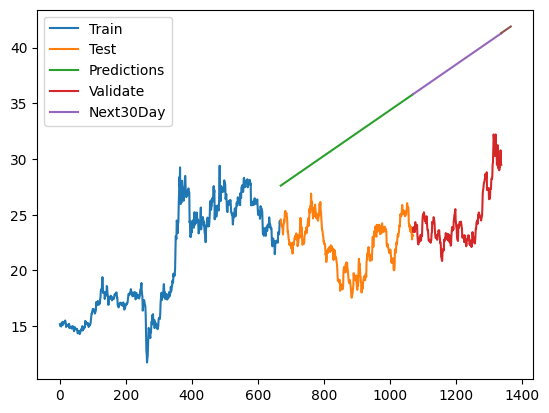

In [73]:
# Plot
plt.plot(train_data.index, train_data['close'])
plt.plot(test_data.index, test_data['close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index,val_data['close'])
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [74]:
X = sm.add_constant(df.index)
model_stat = sm.OLS(df['close'], X)
results = model_stat.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  close   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     710.2
Date:                Sat, 09 Nov 2024   Prob (F-statistic):          7.95e-126
Time:                        09:36:02   Log-Likelihood:                -3463.3
No. Observations:                1338   AIC:                             6931.
Df Residuals:                    1336   BIC:                             6941.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.9370      0.176    101.855      0.0

I. Analyze Residuals (5:3:2)

1. Residual Plot

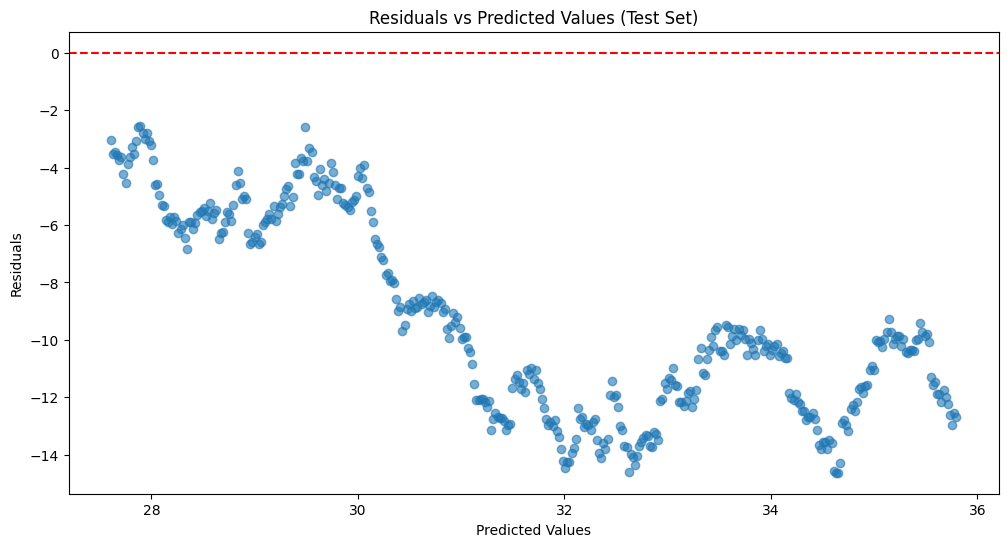

In [75]:
residuals_test = y_test - y_pred
residuals_val = y_val - y_pred_val

# Plotting residuals for the test set
plt.figure(figsize=(12, 6))
plt.scatter(y_pred, residuals_test, alpha=0.6) #lower alpha (e.g., 0.3–0.7) to make overlapping parts visible.
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Test Set)')
plt.show()

2. Histogram of Residuals:

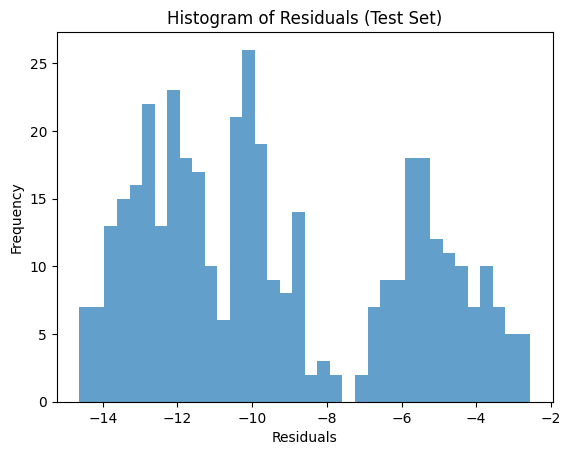

In [76]:
bins = int(np.sqrt(len(df)))
bins

#bins: a value around 20–30 for general use and adjust based on how detailed you want the histogram to appear.
plt.hist(residuals_test, bins, alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals (Test Set)')
plt.show()



II. Test Assumptions

1. Linearity Assumption:

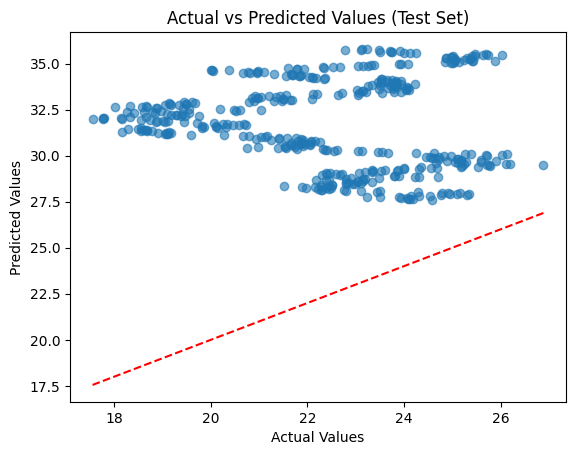

In [77]:
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Test Set)')
plt.show()

2. Homoscedasticity (Variance Uniformity):
#Use the residuals plot from Step 1 for this check.

3. Independence of Residuals:


In [78]:

from statsmodels.stats.stattools import durbin_watson

dw_test = durbin_watson(residuals_test)
print('Durbin-Watson statistic:', dw_test)

Durbin-Watson statistic: 0.001712843660708152
